<a href="https://colab.research.google.com/github/bforeman44/FDSfE_BForeman/blob/main/HW2/HW2_happiness_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import scipy as sp
from scipy import stats

In [ ]:
happiness15 = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/happines.csv")

In [ ]:
happiness15

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
158,Namibia,NaN,4.639,NaN,0.87900,NaN,0.47700,0.40100,0.05600,0.07000,NaN,2019


In [ ]:
happiness15.shape

(160, 12)

In [ ]:
happiness15.head(10)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


In [ ]:
happiness15.tail(10)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
150,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,2015
151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,2015
152,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
158,Namibia,NaN,4.639,NaN,0.87900,NaN,0.47700,0.40100,0.05600,0.07000,NaN,2019
159,Gambia,NaN,4.516,NaN,0.30800,NaN,0.42800,0.38200,0.16700,0.26900,NaN,2019


In [ ]:
happiness15.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Happiness Score                     5.365756
Standard Error                      0.047885
Economy (GDP per Capita)            0.842979
Family                              0.991046
Health (Life Expectancy)            0.628037
Freedom                             0.428151
Trust (Government Corruption)       0.143023
Generosity                          0.236448
Dystopia Residual                   2.098977
year                             2015.050000
dtype: float64

In [ ]:
happiness15.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Happiness Score                  1.141280
Standard Error                   0.017146
Economy (GDP per Capita)         0.402840
Family                           0.272369
Health (Life Expectancy)         0.246332
Freedom                          0.149803
Trust (Government Corruption)    0.119492
Generosity                       0.126605
Dystopia Residual                0.553550
year                             0.445805
dtype: float64

In [ ]:
happiness15.quantile()

Happiness Score                     5.203000
Standard Error                      0.043940
Economy (GDP per Capita)            0.901085
Family                              1.029510
Health (Life Expectancy)            0.695745
Freedom                             0.434635
Trust (Government Corruption)       0.107220
Generosity                          0.216130
Dystopia Residual                   2.095415
year                             2015.000000
Name: 0.5, dtype: float64

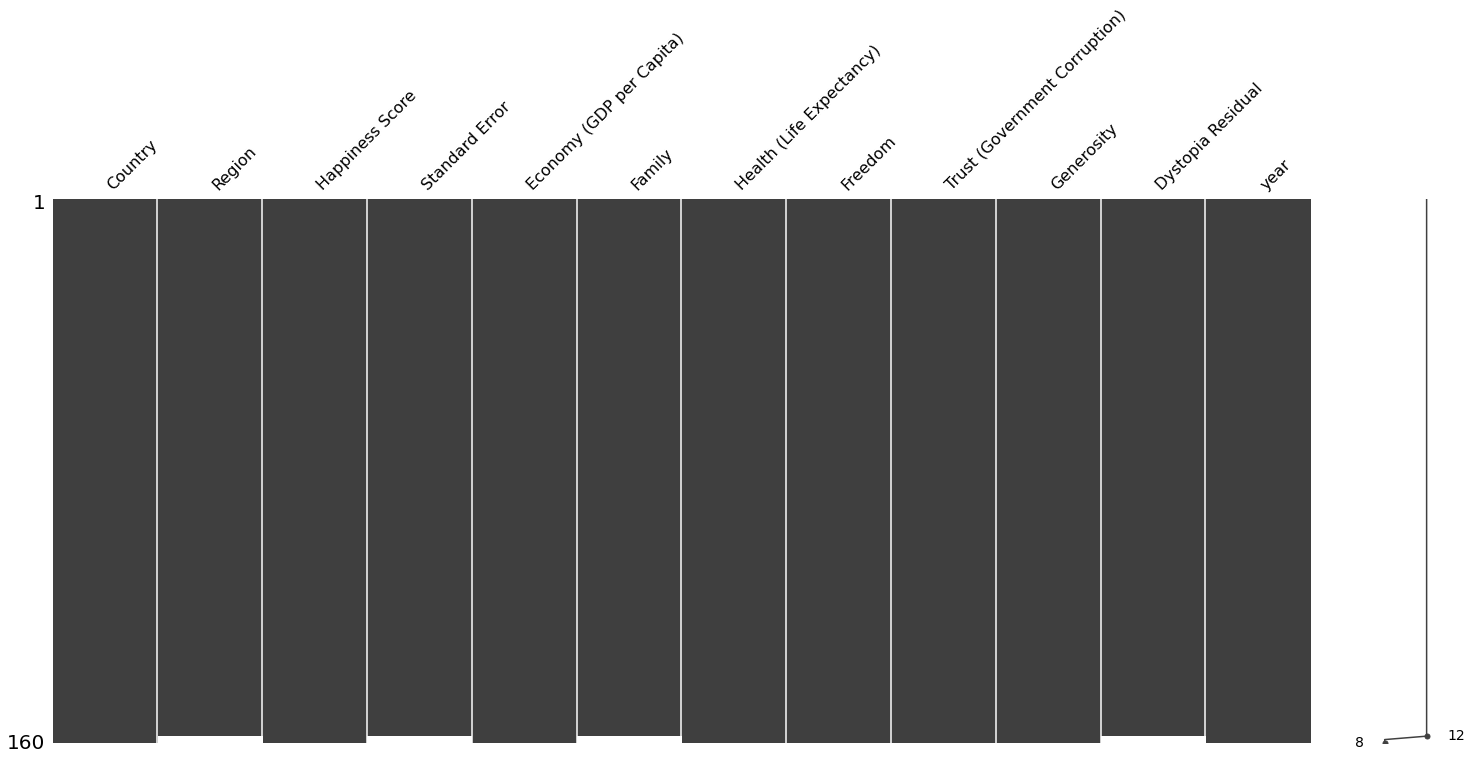

In [ ]:
msno.matrix(happiness15);

In [ ]:
happiness15.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')

In [ ]:
mhappy = happiness15[happiness15['Happiness Score'] ==happiness15["Happiness Score"].max()]
print("The happiest country is {}".format(mhappy.Country.values[-1]))

The happiest country is Switzerland


In [ ]:
for x in range(4,len(happiness15.columns)-1):
  h = happiness15.columns[x]
  test = happiness15[happiness15[h] ==happiness15[h].max()]
  if mhappy.Country.values[0] == test.Country.values[0]:
    print("Switzerland has the best {}".format(h))
  else:
    print( "Switzerland does not have the best {} but {} does".format(h,test.Country.values[0]))

Switzerland does not have the best Economy (GDP per Capita) but Qatar does
Switzerland does not have the best Family but Iceland does
Switzerland does not have the best Health (Life Expectancy) but Singapore does
Switzerland does not have the best Freedom but Norway does
Switzerland does not have the best Trust (Government Corruption) but Rwanda does
Switzerland does not have the best Generosity but Myanmar does
Switzerland does not have the best Dystopia Residual but Mexico does


In [ ]:
choice = happiness15[happiness15["Country"] == "United States"]
choice["Happiness Score"]

14    7.119
Name: Happiness Score, dtype: float64

In [ ]:
happiness15.groupby("Country").max().sort_values(by="Happiness Score", ascending =False).head(10)

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Country,,,,,,,,,,,
Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015


In [ ]:
happiness15[['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']].corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780130,0.740605,0.725936,0.568437,0.395285,0.182865,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780130,-0.217651,1.000000,0.645299,0.815719,0.370565,0.303545,-0.013182,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.725936,-0.310287,0.815719,0.531104,1.000000,0.361440,0.248882,0.111181,0.018979
Freedom,0.568437,-0.129773,0.370565,0.441518,0.361440,1.000000,0.492886,0.372662,0.062783
Trust (Government Corruption),0.395285,-0.178325,0.303545,0.205605,0.248882,0.492886,1.000000,0.280428,-0.033105
Generosity,0.182865,-0.088439,-0.013182,0.087513,0.111181,0.372662,0.280428,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [ ]:
from matplotlib import pyplot as plt
import scipy as sp
from scipy import stats

In [ ]:
correl = happiness15[['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']].corr()

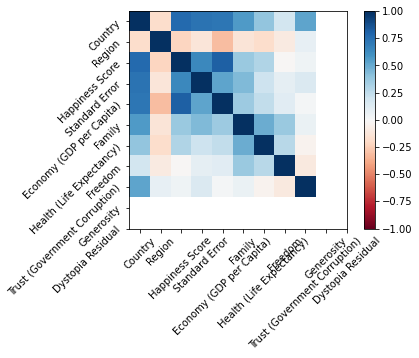

In [ ]:
import pylab as pl
pl.imshow(happiness15[['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']].corr(),
          clim=(-1,1), cmap="RdBu")
pl.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ], ['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'], 
          rotation= 45)
pl.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'], 
          rotation= 45)
pl.colorbar();

The only correlation that I noticed was that happiness has no real dependance on any of the other factors of the countries.

In [ ]:
happiness15.groupby("Region").max().sort_values(by="Generosity", ascending =False)

,Country,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Region,,,,,,,,,,,
Southeastern Asia,Vietnam,6.798,0.06698,1.52186,1.26504,1.02525,0.66246,0.49210,0.79588,2.31945,2015
Western Europe,United Kingdom,7.587,0.05635,1.56391,1.40223,0.95562,0.66973,0.48357,0.51912,2.70201,2015
Sub-Saharan Africa,Zimbabwe,5.477,0.11068,1.06024,1.18468,0.70950,0.59201,0.55191,0.50318,3.05137,2015
Southern Asia,Sri Lanka,5.253,0.03751,0.83524,1.10395,0.70806,0.53726,0.15445,0.47998,3.10709,2015
Australia and New Zealand,New Zealand,7.286,0.04083,1.33358,1.31967,0.93156,0.65124,0.42922,0.47501,2.26646,2015
Middle East and Northern Africa,Yemen,7.278,0.07832,1.69042,1.22393,0.91387,0.64157,0.52208,0.47179,3.08854,2015
Latin America and Caribbean,Venezuela,7.226,0.13693,1.21183,1.30477,0.86027,0.63376,0.24558,0.46187,3.60214,2015
North America,United States,7.427,0.03839,1.39451,1.32261,0.90563,0.63297,0.32957,0.45811,2.51011,2015
Eastern Asia,Taiwan,6.298,0.05051,1.38604,1.30060,1.01328,0.59608,0.37124,0.39478,2.32323,2015


The region with the highest generosity is Southeastern Asia.